# Load Data

In [3]:
import nibabel as nib
data1 = nib.load('Data/sub-01_task-theoryofmindwithmanualresponse_run-01_bold.nii.gz')
data1

# Read Time Series

In [4]:
import readBoldData as rbd
y_i = rbd.voxelTimeSeries(data1,20,20,20)
y_i

array([[1014.],
       [1024.],
       [1058.],
       [1029.],
       [1038.],
       [1039.],
       [1013.],
       [1033.],
       [1031.],
       [1044.],
       [1041.],
       [1054.],
       [1054.],
       [1031.],
       [1038.],
       [1048.],
       [1026.],
       [1036.],
       [1038.],
       [1017.],
       [1039.],
       [1044.],
       [1029.],
       [1041.],
       [1047.],
       [1043.],
       [1021.],
       [1057.],
       [1036.],
       [1024.],
       [1040.],
       [1054.],
       [1029.],
       [1042.],
       [1040.],
       [1023.],
       [1032.],
       [1042.],
       [1040.],
       [1036.],
       [1017.],
       [1049.],
       [1027.],
       [1032.],
       [1021.],
       [1020.],
       [1038.],
       [1029.],
       [1032.],
       [1022.],
       [1023.],
       [1025.],
       [1011.],
       [1027.],
       [1033.],
       [1004.],
       [1026.],
       [1019.],
       [1032.],
       [1049.],
       [1021.],
       [1031.],
       [

# Create mask

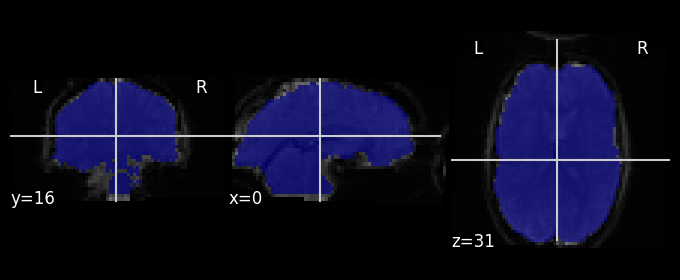

In [5]:
from nilearn.masking import compute_epi_mask
from nilearn.plotting import plot_roi
from nilearn.image.image import mean_img
mean_haxby = mean_img(data1)
mask_img = compute_epi_mask(data1, connected=False)
plot_roi(mask_img,mean_haxby)

In [6]:
from nilearn.masking import apply_mask
masked_data = apply_mask(data1, mask_img)
masked_data.shape

(179, 40078)

# Create Design Matrix

In [27]:
import pandas as pd

events1 = 'Data/sub-01_task-theoryofmindwithmanualresponse_run-01_events.tsv'

df_events1 = pd.read_csv(events1,sep='\t')

stim_ev1 = df_events1[df_events1['trial_type'].notnull()]
df_ev1 = df_events1[df_events1['trial_type'].isnull()].reset_index(drop=True)
for r in range(len(stim_ev1)):
  df_ev1.at[int(stim_ev1.iloc[r,0]/2),'duration'] = stim_ev1.iloc[r,:]['duration']
  df_ev1.at[int(stim_ev1.iloc[r,0]/2),'trial_type'] = stim_ev1.iloc[r,:]['trial_type']

df_ev1

,onset,duration,trial_type,ConditionCode,CorrectAnswerCode,KeyPressed,ResponseTime,StoryCode
0,0.0,2.0,NaN,0.0,0.0,46.0,1.980,0.0
1,2.0,2.0,NaN,0.0,0.0,46.0,1.992,0.0
2,4.0,2.0,NaN,0.0,0.0,46.0,1.994,0.0
3,6.0,2.0,NaN,0.0,0.0,46.0,1.994,0.0
4,8.0,2.0,NaN,0.0,0.0,46.0,1.993,0.0
...,...,...,...,...,...,...,...,...
174,348.0,2.0,NaN,0.0,0.0,46.0,1.985,0.0
175,350.0,2.0,NaN,0.0,0.0,46.0,1.993,0.0
176,352.0,2.0,NaN,0.0,0.0,46.0,2.003,0.0
177,354.0,2.0,NaN,0.0,0.0,46.0,1.995,0.0


/Users/juanesfco/Library/Python/3.9/lib/python/site-packages/nilearn/glm/first_level/experimental_paradigm.py:120: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(


<Axes: label='conditions', ylabel='scan number'>

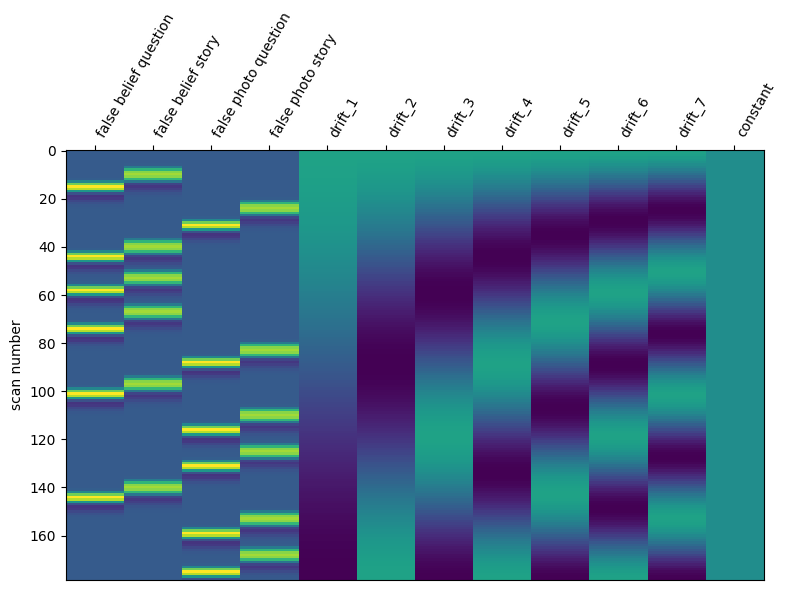

In [28]:
import numpy as np
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt

tr = 2.0  # repetition time is 2 seconds
n_scans = 179  # the acquisition comprises 179 scans
frame_times = np.arange(n_scans) * tr

conditions = df_ev1['trial_type']
duration = df_ev1['duration']
onsets = df_ev1['onset']

events = pd.DataFrame({'trial_type': conditions, 'onset': onsets, 'duration': duration})

X1 = make_first_level_design_matrix(frame_times, events)

fig, ax = plt.subplots(figsize=(8, 6))
plot_design_matrix(X1, ax=ax)

# Finding SNR

In [29]:
SNR_Image = rbd.SNR(X1,masked_data)
SNR_Image

array([2.96071512, 2.8899586 , 3.22663349, 3.19823999, 2.91657249,
       4.58319302, 3.48164891, 3.75022387, 2.68932846, 2.91409403,
       4.16812115, 3.07964486, 3.89948659, 3.42928664, 3.15250453,
       3.51522684, 2.75949646, 4.29111658, 4.80890991, 3.73342995,
       2.91734022, 5.15583068, 4.91840309, 3.08426234, 2.57535102,
       3.75412892, 3.20097205, 3.47645597, 4.62272157, 5.19285199,
       5.70528035, 2.50488188, 2.92478469, 4.9617556 , 3.76051602,
       5.07166593, 4.69646453, 5.23165802, 4.78864863, 3.48105565,
       3.00340754, 3.8792048 , 4.40024586, 5.18665523, 4.17790766,
       1.98154121, 2.53771499, 2.87889442, 4.94996503, 5.07568212,
       4.27898708, 3.36314264, 2.59334498, 4.95293485, 2.11695221,
       4.63994625, 4.90811473, 4.46003199, 5.154364  , 2.76729889,
       3.20271039, 3.93440983, 3.00602236, 3.44499563, 4.56082974,
       4.93192196, 2.51763602, 3.04042753, 2.57543977, 2.68649107,
       2.03037758, 2.40213162, 3.08216216, 3.46787261, 3.12768

In [31]:
np.load('snr.npy')

array([2.91111065, 2.89496503, 3.18526787, 3.11646095, 2.88911301,
       4.53657767, 3.52555424, 3.90052947, 2.69819876, 2.82538696])

In [1]:
import numpy as np
data = np.load('SNR.npy')
data

array([2.93557498, 2.91191535, 3.19272896, ..., 3.40254759, 3.2187289 ,
       3.05352432])

In [8]:
from nilearn.masking import unmask

data_unmasked = unmask(data, mask_img)

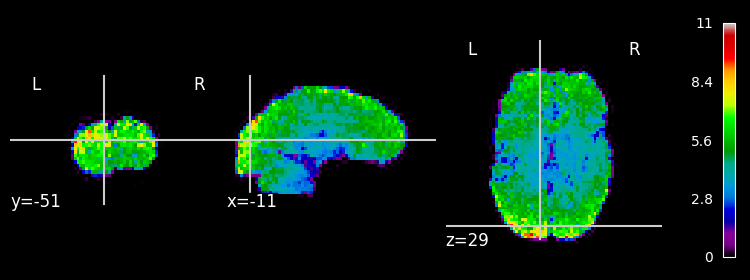

In [11]:
from nilearn.plotting import plot_epi

plot_epi(data_unmasked, colorbar=True)

(array([6.2900e+02, 1.9970e+03, 6.4240e+03, 1.4449e+04, 1.1637e+04,
        3.8970e+03, 8.6100e+02, 1.5300e+02, 2.4000e+01, 7.0000e+00]),
 array([ 0.19670655,  1.33556292,  2.47441928,  3.61327564,  4.75213201,
         5.89098837,  7.02984473,  8.16870109,  9.30755746, 10.44641382,
        11.58527018]),
 <BarContainer object of 10 artists>)

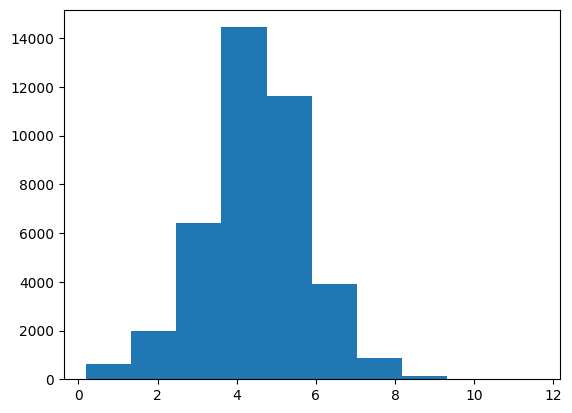

In [12]:
import matplotlib.pyplot as plt
plt.hist(data)

In [7]:
import pandas as pd
X = pd.read_csv('Data/Simulations/X.csv')
X

,st,constant
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
95,0.0,1.0
96,0.0,1.0
97,0.0,1.0
98,0.0,1.0


In [8]:
import numpy as np
y_n = np.load('Data/Simulations/y_noise.npy')
y_n.shape

(10000, 100, 1)

In [9]:
y_n[0].shape

(100, 1)

In [11]:
len(y_n)

10000

In [16]:
import bayesianModel as bM
betas = bM.betas(X.values,y_n[0])
betas[0]

array([ -0.96025305, 499.27408789])

In [28]:
e = (X@(betas[0,:])).values[np.newaxis].T-(y_n[0])

In [30]:
len(e)

100

In [1]:
import numpy as np
data = np.load('SNR_Sim.npy')
data

array([30.87461342, 27.16797282, 35.2194965 , ..., 29.36790557,
       21.27855841, 20.80402149])

(array([  97.,  844., 2389., 2994., 2122., 1053.,  374.,   92.,   28.,
           7.]),
 array([12.82501714, 16.18088923, 19.53676132, 22.89263342, 26.24850551,
        29.6043776 , 32.96024969, 36.31612178, 39.67199388, 43.02786597,
        46.38373806]),
 <BarContainer object of 10 artists>)

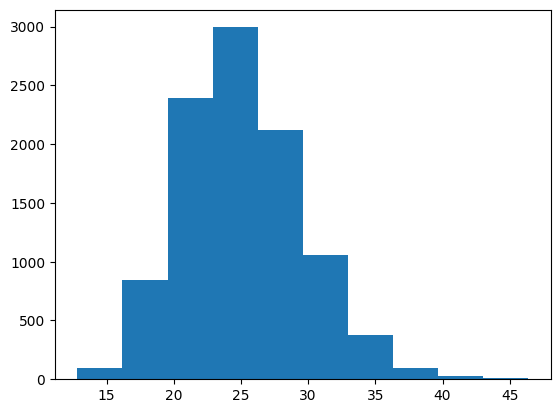

In [2]:
import matplotlib.pyplot as plt
plt.hist(data)